In [1]:
import xarray as xr
import glob
import numpy as np
import os
import calendar
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
import cmaps
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from matplotlib.colors import ListedColormap

这里的使用的数据为GPM日平均降水资料，时间从2001-2021年，从0.1x0.1分辨率插值到1x1分辨率。

数据下载地址为：

- https://gpm.nasa.gov/data/directory

In [2]:

os.listdir('/DatadiskExt/xpji/GPM')
os.chdir('/DatadiskExt/xpji/GPM')
pwd = os.getcwd()

In [3]:
GPM_path = r'GPM_daily_1x1_2000-2021.nc'
ds = xr.open_dataset(GPM_path).precipitationCal

In [4]:
ds

<xarray.DataArray 'precipitationCal' (time: 7670, lon: 360, lat: 181)>
[499777200 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 ... 2021-12-31
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Attributes:
    long_name:  Daily accumulated precipitation (combined microwave-IR) estimate
    units:      mm

In [5]:
ds_clim = ds.mean('time')

In [6]:
ds_clim = ds_clim.transpose('lat', 'lon')

In [ ]:

myCmap = ListedColormap(['#FFFFFF','#f7fbff','#e3eef9','#d0e1f2','#b7d4ea','#94c4df','#6aaed6','#4a98c9','#2e7ebc','#1764ab','#084a91','#08306b'])

左: 0.05, 下: 0.22999999999999998, 宽: 0.409090909090909, 高: 0.30681818181818177


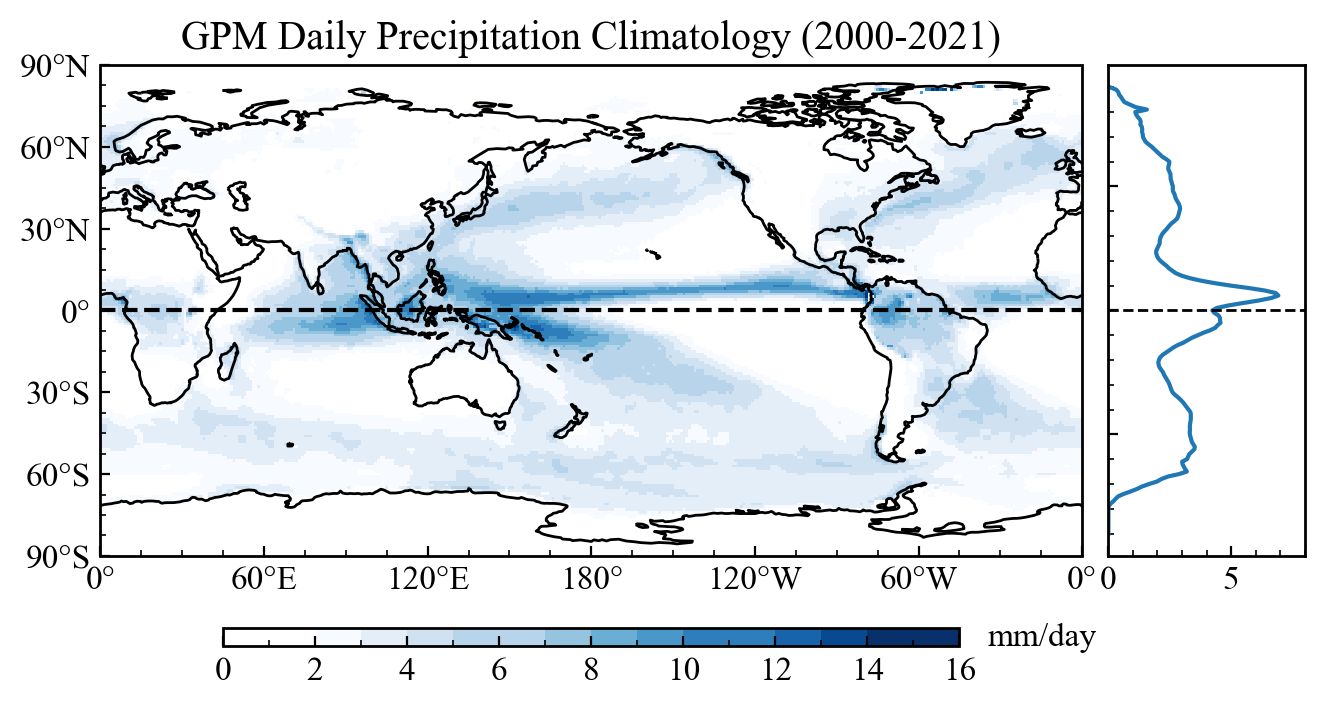

In [8]:

# 设置图形参数
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.1
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure(figsize=(12, 8), dpi=200)  # 调整大小
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree(180))
contour = ds_clim.plot(ax=ax1, transform=ccrs.PlateCarree(),
                        cmap=myCmap, 
                       levels=np.linspace(0, 16, 17), 
                       extend='neither', 
                       cbar_kwargs={'orientation': 'horizontal', 
                                    'shrink': 0.75, 'aspect': 40, 'pad': 0.05},
                       add_colorbar=True, add_labels=False)

cbar = contour.colorbar
cbar.ax.yaxis.set_label_position('right')
cbar.ax.set_ylabel('mm/day', rotation=0, labelpad=30, va='center')
ax1.coastlines()
ax1.set_title('GPM Daily Precipitation Climatology (2000-2021)')
ax1.set_xticks(np.arange(0, 361, 60), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(60))
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax1.hlines(0, -180, 180, color='k', linestyle='--', linewidth=1.5)

position_ax1 = ax1.get_position()  # 返回Bbox对象
left = position_ax1.x0
bottom = position_ax1.y0
width = position_ax1.width
height = position_ax1.height

print(f"左: {left}, 下: {bottom}, 宽: {width}, 高: {height}")
ax2 = fig.add_axes([left+0.42, bottom,width/5,height])
# 计算经向平均
meridional_mean = ds_clim.mean(dim='lon')
# 绘制经向平均图
ax2.plot(meridional_mean, meridional_mean['lat'])
ax2.set_xlim(0, 8)
ax2.set_yticklabels([])
ax2.hlines(0, 0, 42, color='k', linestyle='--', linewidth=1)

plt.show()
plt.close()
fig.savefig('GPM_daily_precipitation_climatology_2000-2021.png')

绘制一下降水的振幅

In [9]:
ds_std = ds.std('time') 

In [10]:
ds_std = ds_std.transpose('lat', 'lon')

左: 0.05, 下: 0.22999999999999998, 宽: 0.409090909090909, 高: 0.30681818181818177


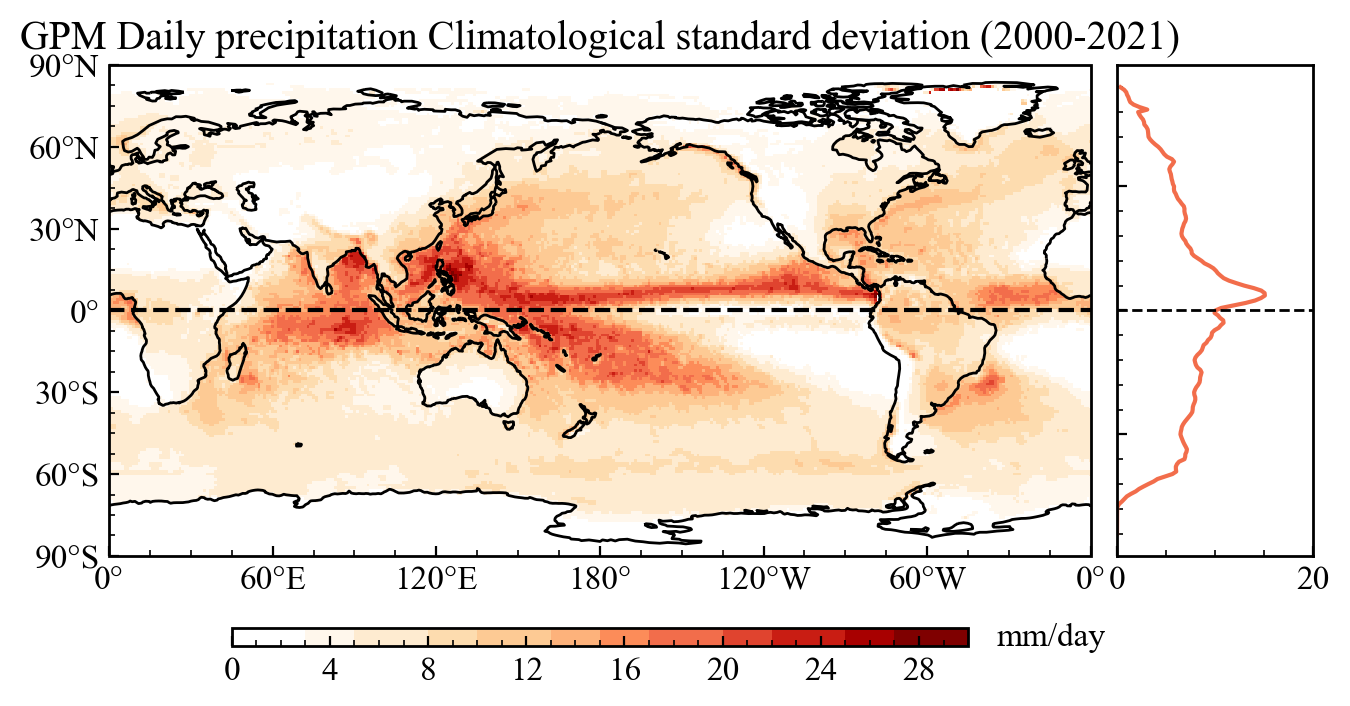

In [20]:
myCmap2 = ListedColormap(['#FFFFFF','#fff7ec','#feebd0','#fddcaf','#fdca94','#fdb27b','#fc8c59','#f26d4b','#e0442f','#c91d13','#a80000','#7f0000'])
fig = plt.figure(figsize=(12, 8), dpi=200)  # 调整大小
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
# 空间分布图的子图
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree(180))
# 绘制空间分布图
contour = ds_std.plot(ax=ax1, transform=ccrs.PlateCarree(),
                        cmap=myCmap2, 
                       levels=np.linspace(0, 30, 31), 
                       extend='neither', 
                       cbar_kwargs={'orientation': 'horizontal', 
                                    'shrink': 0.75, 'aspect': 40, 'pad': 0.05},
                       add_colorbar=True, add_labels=False)

cbar = contour.colorbar
cbar.ax.yaxis.set_label_position('right')
cbar.ax.set_ylabel('mm/day', rotation=0, labelpad=30, va='center')
ax1.coastlines()
ax1.set_title('GPM Daily precipitation Climatological standard deviation (2000-2021)')
ax1.set_xticks(np.arange(0, 361, 60), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(LongitudeFormatter())
ax1.yaxis.set_major_formatter(LatitudeFormatter())
ax1.xaxis.set_major_locator(mticker.MultipleLocator(60))
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator(4))
ax1.hlines(0, -180, 180, color='k', linestyle='--', linewidth=1.5)

position_ax1 = ax1.get_position()  # 返回Bbox对象
left = position_ax1.x0
bottom = position_ax1.y0
width = position_ax1.width
height = position_ax1.height

print(f"左: {left}, 下: {bottom}, 宽: {width}, 高: {height}")
ax2 = fig.add_axes([left+0.42, bottom,width/5,height])
# 计算经向平均
meridional_mean = ds_std.mean(dim='lon')
# 绘制经向平均图
ax2.plot(meridional_mean, meridional_mean['lat'],color='#f26d4b')
ax2.set_xlim(0, 20)
ax2.set_yticklabels([])
ax2.hlines(0, 0, 42, color='k', linestyle='--', linewidth=1)
plt.show()
plt.close()
fig.savefig('GPM_daily_precipitation_climatology_2000-2021_std.png')